# Embedding of ARF microtubes

This is an exploratory notebook for examining the embedding parameter of arf microtubes and the sensitivity of loss to that factor.

In [1]:
import ngsolve as ng
import numpy as np
import matplotlib.pyplot as plt
from ngsolve.webgui import Draw

from fiberamp.fiber.microstruct.arf import ARF


importing NGSolve-6.2.2202-18-gcd039cbb4


In [2]:
# Added embedding factor e to init parameters
a = ARF(name='poletti', outermaterials='air', freecapil=False, e=.5)

  Generating new mesh.
  Refining ARF mesh uniformly 0 times: each element split into four
  Elements/wavelength revised:3 (capillary), 0.48 (air), 1.2 (inner core)
  Elements/wavelength revised: 0.363636 (glass), 0.06 (outer)
ModeSolver: Checking if mesh has required regions
Mesh has  10066  elements,  5046  points,  and  15111  edges.


In [3]:
Draw(a.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2202-18-gcd039cbb4', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [4]:
l =  a.n_air * a.k
z_guess = a.sqrZfrom(.999*l)**.5
z_guess

2.341668296282869

In [5]:
zs, y, _, beta, _, _ = a.leakymode(p=2, ctr=2.24, rad=.1, niterations=12, npts=2, nrestarts=0, nspan=2,
                                    rhoinv=.9, quadrule='ellipse_trapez_shift')

ModeSolver.leakymode called on object with these settings:
 ARF Physical Parameters:
  Rc = 1 x 15 x 1e-6 meters
  tclad = 0.666667 x 15 x 1e-6 meters
  touter = 3.33333 x 15 x 1e-6 meters
  t = 0.028 x 15 x 1e-6 meters
  d = 0.14 x 15 x 1e-6 meters
  Rti = 12.48 x 15 x 1e-6 meters
  Rto = 12.9 x 15 x 1e-6 meters
  Wavelength = 1.8e-06 meters
  Refractive indices: 1.00028 (air), 1.43882 (Si)
Nondimensional Computational Parameters:
  Divide all lengths above by 15 x 1e-6
  to get the actual computational lengths used.
  Cladding starts at Rcladi = 2.706
  PML starts at R = 4.03933 and ends at Rout = 7.37267
  Mesh sizes: 0.04 (capillary), 0.25 (air), 0.1 (inner core)
  Mesh sizes: 0.33 (glass), 2 (outer)
  Elements/wavelength:3 (capillary), 0.48 (air), 1.2 (inner core)
  Elements/wavelength: 0.363636 (glass), 0.06 (outer)
  With embedded capillaries, e/t = 0.5.
Set freq-dependent PML with p= 2  alpha= 1 and thickness=3.333

SpectralProj: Setting shifted trapezoidal rule on elliptical c

In [6]:
for f in y:
    Draw(f, a.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2202-18-gcd039cbb4', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

WebGuiWidget(value={'ngsolve_version': '6.2.2202-18-gcd039cbb4', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

In [7]:
CL = 20 * beta.imag / np.log(10)
zs.real, CL

(array([2.16737564, 2.24794258]), array([1.61259253e+01, 3.66777062e-03]))

# Let's set up a parameter study here with low p values, just to debug the process

We can also just see what the graph looks like for low p.

In [8]:
es = np.linspace(.01, 1, 6)
Zs = np.zeros_like(es, dtype=complex)
betas = np.zeros_like(es, dtype=complex)

In [13]:
for i,e in enumerate(es):
    
    a = ARF(name='poletti', outermaterials='air', freecapil=False, e=e)
    
    zs, y, _, beta, _, _ = a.leakymode(p=2, ctr=2.247, rad=.01, niterations=12, npts=2, nrestarts=0, nspan=2)
    betas[i] = beta[0]
    Zs[i] = zs[0]

  Generating new mesh.
  Refining ARF mesh uniformly 0 times: each element split into four
  Elements/wavelength revised:3 (capillary), 0.48 (air), 1.2 (inner core)
  Elements/wavelength revised: 0.363636 (glass), 0.06 (outer)
ModeSolver: Checking if mesh has required regions
Mesh has  10084  elements,  5055  points,  and  15138  edges.
ModeSolver.leakymode called on object with these settings:
 ARF Physical Parameters:
  Rc = 1 x 15 x 1e-6 meters
  tclad = 0.666667 x 15 x 1e-6 meters
  touter = 3.33333 x 15 x 1e-6 meters
  t = 0.028 x 15 x 1e-6 meters
  d = 0.14 x 15 x 1e-6 meters
  Rti = 12.48 x 15 x 1e-6 meters
  Rto = 12.9 x 15 x 1e-6 meters
  Wavelength = 1.8e-06 meters
  Refractive indices: 1.00028 (air), 1.43882 (Si)
Nondimensional Computational Parameters:
  Divide all lengths above by 15 x 1e-6
  to get the actual computational lengths used.
  Cladding starts at Rcladi = 2.71972
  PML starts at R = 4.05305 and ends at Rout = 7.38639
  Mesh sizes: 0.04 (capillary), 0.25 (air), 

SpectralProjNGPoly: Factorizing 20201x20201 system at z =  +2.247 -0.010j

=========== Starting FEAST iterations ===========
Trying with 2 vectors:

 ITERATION 1 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [1.4e-06 1.9e+02]
   Real part of computed eigenvalues:
   [0.20763631 2.24793096]
   Imag part of computed eigenvalues:
   [ 1.02276413e-02 -2.46584607e-09]
   Relative Hausdorff distance from prior iterate: 4.450e+99

 ITERATION 2 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [0. 0.]
   Real part of computed eigenvalues:
   [2.24793097 2.64140069]
   Imag part of computed eigenvalues:
   [-1.47366571e-09 -7.28082944e-01]
   Relative Hausdorff distance from prior iterate: 9.080e-01

 ITERATION 3 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [2.2e-05 1.6e+02]
   Real part of computed eigenvalues:
   [2.24793097 3.61296922]
   Imag part of computed eigenvalues:
   [-1.47366537e-09 -7.32880312e-01]
   Relative

  Refining ARF mesh uniformly 0 times: each element split into four
  Elements/wavelength revised:3 (capillary), 0.48 (air), 1.2 (inner core)
  Elements/wavelength revised: 0.363636 (glass), 0.06 (outer)
ModeSolver: Checking if mesh has required regions
Mesh has  9994  elements,  5010  points,  and  15003  edges.
ModeSolver.leakymode called on object with these settings:
 ARF Physical Parameters:
  Rc = 1 x 15 x 1e-6 meters
  tclad = 0.666667 x 15 x 1e-6 meters
  touter = 3.33333 x 15 x 1e-6 meters
  t = 0.028 x 15 x 1e-6 meters
  d = 0.14 x 15 x 1e-6 meters
  Rti = 12.48 x 15 x 1e-6 meters
  Rto = 12.9 x 15 x 1e-6 meters
  Wavelength = 1.8e-06 meters
  Refractive indices: 1.00028 (air), 1.43882 (Si)
Nondimensional Computational Parameters:
  Divide all lengths above by 15 x 1e-6
  to get the actual computational lengths used.
  Cladding starts at Rcladi = 2.692
  PML starts at R = 4.02533 and ends at Rout = 7.35867
  Mesh sizes: 0.04 (capillary), 0.25 (air), 0.1 (inner core)
  Mesh si

In [14]:
CLs = 20 * betas.imag / np.log(10)


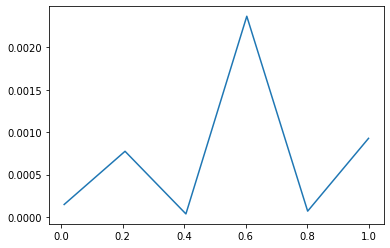

In [15]:
plt.plot(es, CLs)
# plt.yscale('log')